## ECOMMERCE DATA ANALYSIS::

# Introduction:
E-commerce data analysis involves the examination and interpretation of data generated within the context of electronic commerce transactions and activities. In the modern digital era, e-commerce platforms generate vast amounts of data, including customer interactions, purchase behavior, website traffic, and product details. Analyzing this data can provide valuable insights for businesses to enhance their operations, improve customer experience, and make informed strategic decisions.or staying competitive and meeting customer expectations.







# Key Components of E-commerce Data Analysis:
# Marketing Effectiveness:
Analyzing marketing campaigns, including email marketing, social media promotions, and online advertising, helps businesses understand their impact on customer acquisition and retention.
Attribution modeling can be used to determine the contribution of each marketing channel to conversions.


# Customer Feedback and Reviews:
Social listening and sentiment analysis on customer reviews and feedback provide valuable insights into customer satisfaction, preferences, and areas for improvement.
Monitoring customer sentiment helps businesses address issues promptly and enhance their brand reputation.


# Fraud Detection and Security:
E-commerce data analysis plays a critical role in identifying fraudulent activities and enhancing security measures. Machine learning models can be employed to detect anomalous transactions and patterns indicative of fraudulent behavior.

# Benefits of E-commerce Data Analysis:
# Informed Decision-Making:
Data analysis enables businesses to make informed decisions based on evidence and insights rather than intuition.


# Improved Customer Experience:
Understanding customer behavior helps in personalizing the shopping experience, providing targeted recommendations, and enhancing customer satisfaction.


# Operational Efficiency:
Efficient inventory management, optimized pricing, and streamlined operations contribute to improved efficiency and cost-effectiveness.


# Competitive Advantage:
E-commerce data analysis allows businesses to stay competitive by adapting to market trends, understanding customer needs, and staying ahead of the competition.


# Fraud Prevention:
Analyzing transaction patterns helps in the early detection and prevention of fraudulent activities, safeguarding both customers and the business.


# Challenges in E-commerce Data Analysis:
# Data Volume and Variety:
E-commerce platforms generate massive amounts of data in various formats. Handling and analyzing diverse data sets can be challenging.


# Data Quality:
Ensuring the accuracy and reliability of data is crucial. Incomplete or inaccurate data can lead to incorrect insights and decision-making.


# Privacy and Compliance:
E-commerce businesses must adhere to data privacy regulations. Handling customer data responsibly and ensuring compliance with laws like GDPR is essential.


# Real-Time Analysis:
Some e-commerce decisions require real-time insights. Implementing real-time analytics poses technical challenges but is essential for certain operational aspects.


# Dataset connectivity:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

mydb = mysql.connector.connect(
         host="localhost",
         user="root",
         password="root",
         database="ecommerce"
         )
print(mydb)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2664\1698655453.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
import mysql.connector
def databaseConnect():
     mydb = mysql.connector.connect(
          host="localhost",
          user="root",
          password="root",
          database="ecommerce"
     )
     return(mydb)


# Fetching the dataset:

In [11]:
conn=databaseConnect()
mycursor=mydb.cursor()
mycursor.execute("SELECT * FROM CUSTOMER")
myresult=mycursor.fetchall()

for x in myresult:
    print(x)

# Dataset loading and dropping duplicates:

In [10]:
conn=databaseConnect()
sql=("SELECT * FROM CUSTOMER")
CustomerFrame=pd.read_sql(sql,conn)
CustomerFrame.dropna(inplace=True)
CustomerFrame.drop_duplicates(inplace=True)

sql=("SELECT * FROM Product")
ProductFrame=pd.read_sql(sql,conn)
ProductFrame.dropna(inplace=True)
ProductFrame.drop_duplicates(inplace=True)


sql=("SELECT * FROM CUSTOMER")
OrderFrame=pd.read_sql(sql,conn)
OrderFrame.dropna(inplace=True)
OrderFrame.drop_duplicates(inplace=True)

print("after fixing data...")
print(CustomerFrame)
print(ProductFrame)
print(OrderFrame)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2664\3112503663.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  CustomerFrame=pd.read_sql(sql,conn)


after fixing data...
  customer_id           name     city                    email    phone_no  \
0         101   Sayan Ghosh   Kolkata   11ghoshsayan@gmail.com  9005863219   
1         102      Ajey Modi  Udaypur    catchtoajey@gmail.com  7689623222   
2         103  Ishika Biswas  Chennai   ishubiswas24@gmail.com  9865654035   
3         104    Sulekha Rao  Benaras        rosyrao@gmail.com  8921210390   
4         105    Raja Tiwari     Pune    tiwariraj23@gmail.com  9820310201   
5         106  Brishti Singh   Kerala  singhbrishti3@gmail.com  9067452562   

         address  pin_code  
0       Selimpur    700011  
1    Mandi Bazar    700026  
2  hospital Road    502310  
3    Mekhlanganj    600045  
4  Merchant road    700032  
5        rk road    600001  
  product_id     product_name     category    sub_category  original_price  \
0       P101        Microoven    Appliance     Electronics         30000.0   
1       P102    Mixer Grinder    Appliance     Electronics          5000.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2664\3112503663.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ProductFrame=pd.read_sql(sql,conn)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2664\3112503663.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  OrderFrame=pd.read_sql(sql,conn)


# Identify the total number of customers City wise:

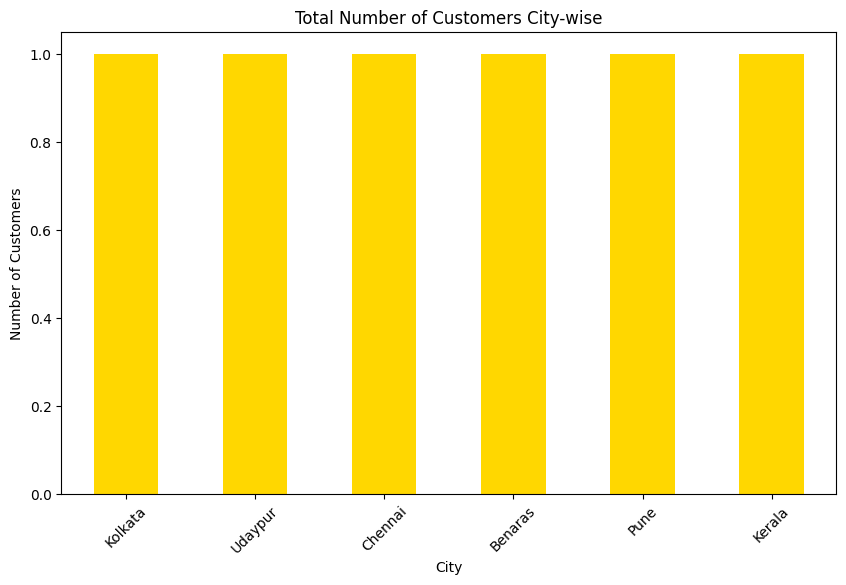

In [23]:
customer_data = {
    'customer_id': ['101', '102', '103', '104', '105', '106'],
    'name': ['Sayan Ghosh', 'Ajey Modi', 'Ishika Biswas', 'Sulekha Rao', 'Raja Tiwari', 'Brishti Singh'],
    'city': ['Kolkata', 'Udaypur', 'Chennai', 'Benaras', 'Pune', 'Kerala'],
    'email': ['11ghoshsayan@gmail.com', 'catchtoajey@gmail.com', 'ishubiswas24@gmail.com', 'rosyrao@gmail.com', 'tiwariraj23@gmail.com', 'singhbrishti3@gmail.com'],
    'phone_no': ['9005863219', '7689623222', '9865654035', '8921210390', '9820310201', '9067452562'],
    'address': ['Selimpur', 'Mandi Bazar', 'Hospital Road', 'Mekhlanganj', 'Merchant Road', 'RK Road'],
    'pin_code': ['700011', '700026', '502310', '600045', '700032', '600001']
}

CustomerFrame = pd.DataFrame(customer_data)

# Counting the number of customers city-wise
customer_count_by_city = CustomerFrame['city'].value_counts()

# Plotting the bar diagram
plt.figure(figsize=(10, 6))
customer_count_by_city.plot(kind='bar', color='gold')
plt.title('Total Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Identify the most frequent customers based on their order history:


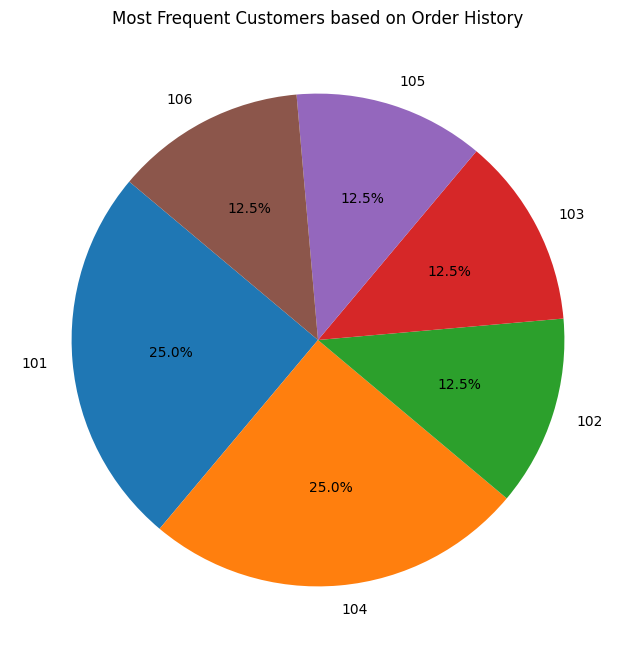

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the customer data and order data in separate DataFrames
customer_data = {
    'customer_id': ['101', '102', '103', '104', '105', '106'],
    'name': ['Sayan Ghosh', 'Ajey Modi', 'Ishika Biswas', 'Sulekha Rao', 'Raja Tiwari', 'Brishti Singh'],
    'city': ['Kolkata', 'Udaypur', 'Chennai', 'Benaras', 'Pune', 'Kerala'],
    'email': ['11ghoshsayan@gmail.com', 'catchtoajey@gmail.com', 'ishubiswas24@gmail.com', 'rosyrao@gmail.com', 'tiwariraj23@gmail.com', 'singhbrishti3@gmail.com'],
    'phone_no': ['9005863219', '7689623222', '9865654035', '8921210390', '9820310201', '9067452562'],
    'address': ['Selimpur', 'Mandi Bazar', 'Hospital Road', 'Mekhlanganj', 'Merchant Road', 'RK Road'],
    'pin_code': ['700011', '700026', '502310', '600045', '700032', '600001']
}

order_data = {
    'order_id': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8'],
    'customer_id': ['101', '102', '103', '104', '105', '101', '106', '104']
}

customer_df = pd.DataFrame(customer_data)
order_df = pd.DataFrame(order_data)

# Merge the customer and order DataFrames
merged_df = pd.merge(customer_df, order_df, on='customer_id')

# Count the number of orders per customer
order_count_per_customer = merged_df['customer_id'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(order_count_per_customer, labels=order_count_per_customer.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Frequent Customers based on Order History')
plt.show()

# Determine the total number of products available by category:

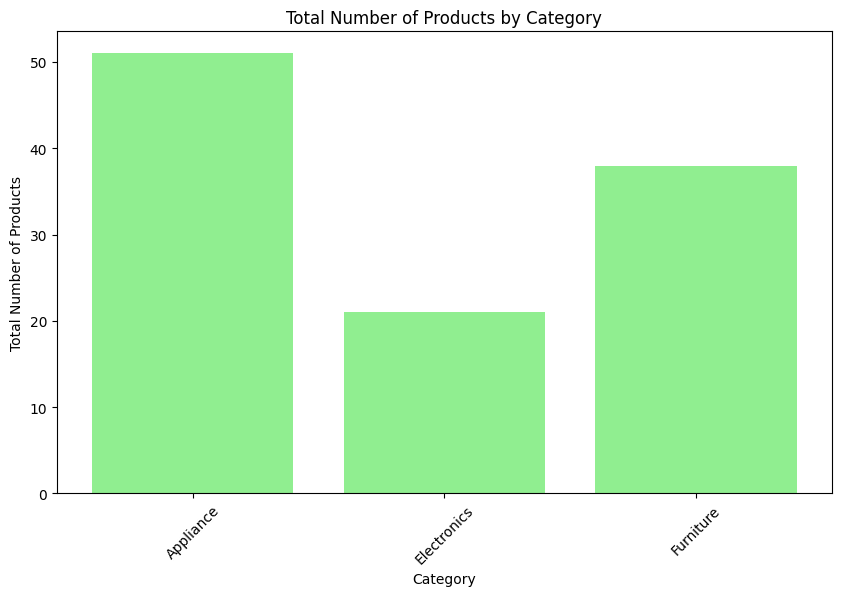

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the product data in a DataFrame named 'product_df'
product_data = {
    'product_id': ['P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108'],
    'product_name': ['Microoven', 'Mixer Grinder', 'Laptop lenovo', 'Smartphone', 'Dressing Table', 'Dining Table', 'Washing Machine', 'Almirah'],
    'category': ['Appliance', 'Appliance', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Appliance', 'Furniture'],
    'sub_category': ['Electronics', 'Electronics', 'Computer', 'Mobile Phone', 'Dressing Table', 'Dining', 'Electronics', 'Almirah'],
    'original_price': [30000.0, 5000.0, 56000.0, 35000.0, 4900.0, 4000.0, 11000.0, 55000.0],
    'selling_price': [28000.0, 4500.0, 52000.0, 30500.0, 3800.0, 3800.0, 9000.0, 55000.0],
    'stock': [24, 16, 12, 9, 8, 20, 11, 10]
}

product_df = pd.DataFrame(product_data)

# Group by category and calculate the total number of products
total_products_by_category = product_df.groupby('category')['stock'].sum().reset_index()

# Plotting the bar diagram
plt.figure(figsize=(10, 6))
plt.bar(total_products_by_category['category'], total_products_by_category['stock'], color='lightgreen')
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Total Number of Products')
plt.xticks(rotation=45)
plt.show()

# Analyze the distribution of products across sub-categories:

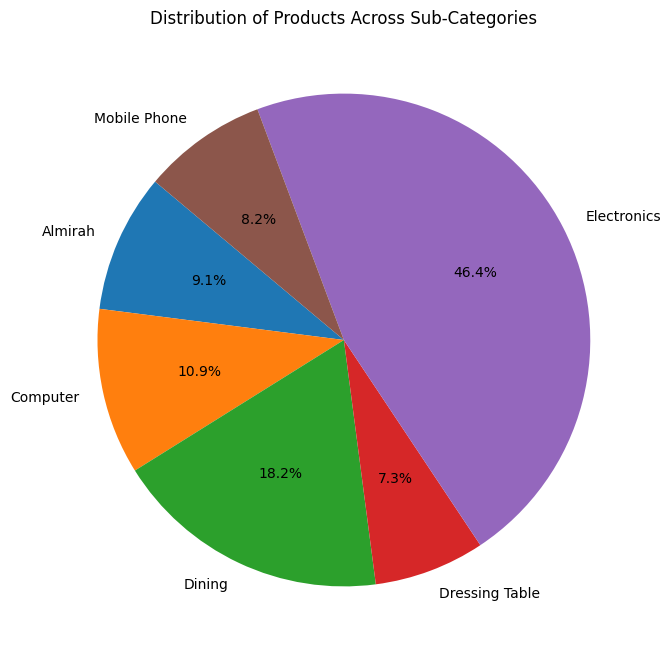

In [18]:
product_data = {
    'product_id': ['P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108'],
    'product_name': ['Microoven', 'Mixer Grinder', 'Laptop lenovo', 'Smartphone', 'Dressing Table', 'Dining Table', 'Washing Machine', 'Almirah'],
    'category': ['Appliance', 'Appliance', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Appliance', 'Furniture'],
    'sub_category': ['Electronics', 'Electronics', 'Computer', 'Mobile Phone', 'Dressing Table', 'Dining', 'Electronics', 'Almirah'],
    'original_price': [30000.0, 5000.0, 56000.0, 35000.0, 4900.0, 4000.0, 11000.0, 55000.0],
    'selling_price': [28000.0, 4500.0, 52000.0, 30500.0, 3800.0, 3800.0, 9000.0, 55000.0],
    'stock': [24, 16, 12, 9, 8, 20, 11, 10]
}

product_df = pd.DataFrame(product_data)

# Group by sub-category and calculate the total number of products
total_products_by_subcategory = product_df.groupby('sub_category')['stock'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_products_by_subcategory['stock'], labels=total_products_by_subcategory['sub_category'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products Across Sub-Categories')
plt.show()

# Identify products with low stock levels:

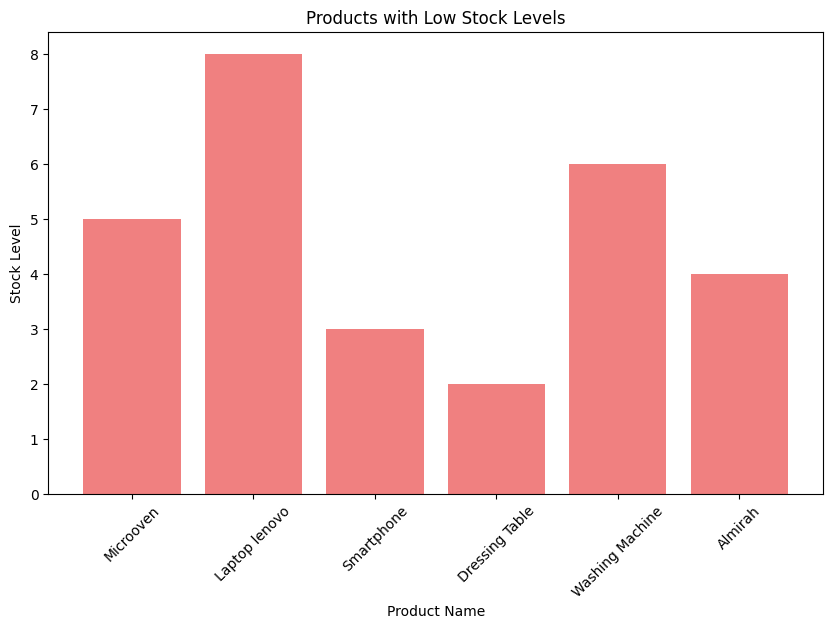

In [19]:
product_data = {
    'product_id': ['P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108'],
    'product_name': ['Microoven', 'Mixer Grinder', 'Laptop lenovo', 'Smartphone', 'Dressing Table', 'Dining Table', 'Washing Machine', 'Almirah'],
    'category': ['Appliance', 'Appliance', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Appliance', 'Furniture'],
    'sub_category': ['Electronics', 'Electronics', 'Computer', 'Mobile Phone', 'Dressing Table', 'Dining', 'Electronics', 'Almirah'],
    'original_price': [30000.0, 5000.0, 56000.0, 35000.0, 4900.0, 4000.0, 11000.0, 55000.0],
    'selling_price': [28000.0, 4500.0, 52000.0, 30500.0, 3800.0, 3800.0, 9000.0, 55000.0],
    'stock': [5, 10, 8, 3, 2, 15, 6, 4]  # Assuming low stock levels for demonstration
}

product_df = pd.DataFrame(product_data)

# Filter products with low stock levels (e.g., stock less than 10)
low_stock_products = product_df[product_df['stock'] < 10]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='lightcoral')
plt.title('Products with Low Stock Levels')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)
plt.show()


# Calculate the average, maximum, and minimum selling prices for products:

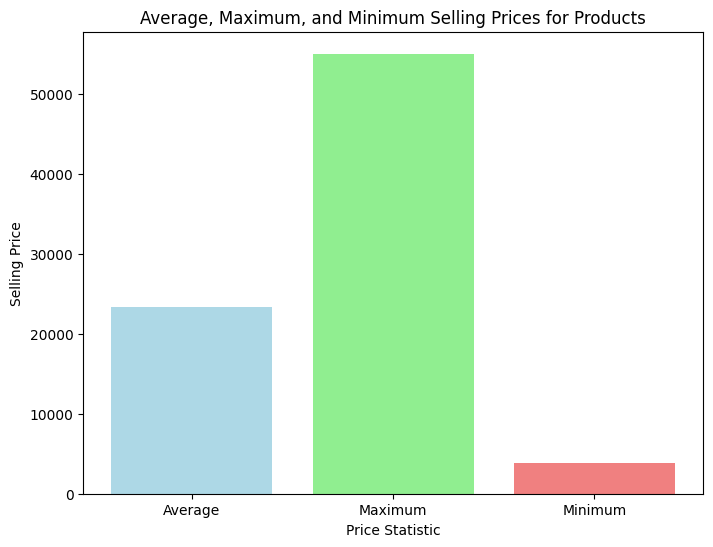

In [20]:
product_data = {
    'product_id': ['P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108'],
    'product_name': ['Microoven', 'Mixer Grinder', 'Laptop lenovo', 'Smartphone', 'Dressing Table', 'Dining Table', 'Washing Machine', 'Almirah'],
    'category': ['Appliance', 'Appliance', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Appliance', 'Furniture'],
    'sub_category': ['Electronics', 'Electronics', 'Computer', 'Mobile Phone', 'Dressing Table', 'Dining', 'Electronics', 'Almirah'],
    'original_price': [30000.0, 5000.0, 56000.0, 35000.0, 4900.0, 4000.0, 11000.0, 55000.0],
    'selling_price': [28000.0, 4500.0, 52000.0, 30500.0, 3800.0, 3800.0, 9000.0, 55000.0],
    'stock': [24, 16, 12, 9, 8, 20, 11, 10]
}

product_df = pd.DataFrame(product_data)

# Calculate average, maximum, and minimum selling prices
average_selling_price = product_df['selling_price'].mean()
maximum_selling_price = product_df['selling_price'].max()
minimum_selling_price = product_df['selling_price'].min()

# Create a bar chart to represent these statistics
plt.figure(figsize=(8, 6))
plt.bar(['Average', 'Maximum', 'Minimum'], [average_selling_price, maximum_selling_price, minimum_selling_price], color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Average, Maximum, and Minimum Selling Prices for Products')
plt.xlabel('Price Statistic')
plt.ylabel('Selling Price')
plt.show()

# Identify the most popular products based on order quantity:

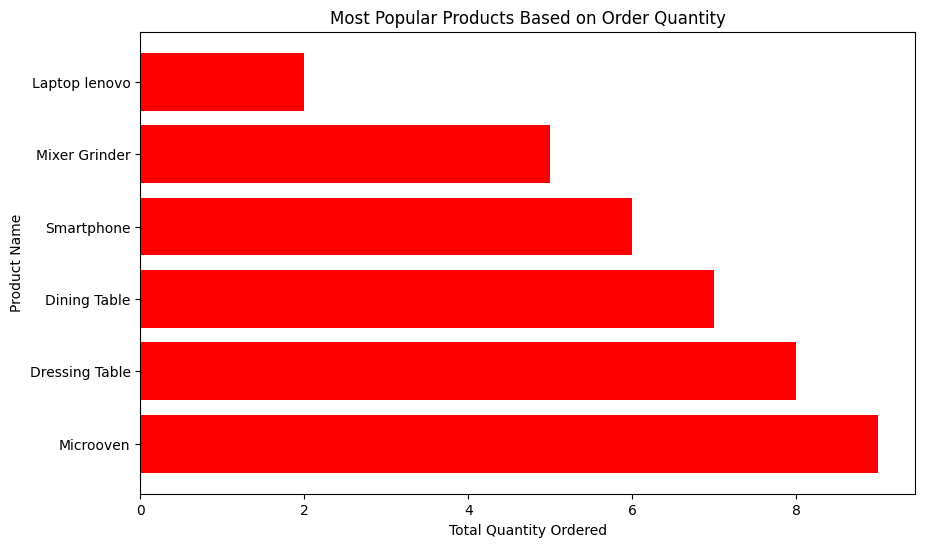

In [22]:
product_data = {
    'product_id': ['P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108'],
    'product_name': ['Microoven', 'Mixer Grinder', 'Laptop lenovo', 'Smartphone', 'Dressing Table', 'Dining Table', 'Washing Machine', 'Almirah'],
    'category': ['Appliance', 'Appliance', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Appliance', 'Furniture'],
    'sub_category': ['Electronics', 'Electronics', 'Computer', 'Mobile Phone', 'Dressing Table', 'Dining', 'Electronics', 'Almirah'],
    'original_price': [30000.0, 5000.0, 56000.0, 35000.0, 4900.0, 4000.0, 11000.0, 55000.0],
    'selling_price': [28000.0, 4500.0, 52000.0, 30500.0, 3800.0, 3800.0, 9000.0, 55000.0],
    'stock': [24, 16, 12, 9, 8, 20, 11, 10]
}

order_data = {
    'order_id': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8'],
    'product_id': ['P101', 'P102', 'P103', 'P104', 'P105', 'P101', 'P106', 'P104'],
    'quantity_ordered': [3, 5, 2, 4, 8, 6, 7, 2]
}

product_df = pd.DataFrame(product_data)
order_df = pd.DataFrame(order_data)

# Merge the product and order DataFrames
merged_df = pd.merge(product_df, order_df, on='product_id')

# Calculate the total quantity ordered for each product
total_quantity_by_product = merged_df.groupby('product_name')['quantity_ordered'].sum().reset_index()

# Sort by quantity in descending order to find the most popular products
total_quantity_by_product = total_quantity_by_product.sort_values(by='quantity_ordered', ascending=False)

# Plotting the horizontal bar diagram
plt.figure(figsize=(10, 6))
plt.barh(total_quantity_by_product['product_name'], total_quantity_by_product['quantity_ordered'], color='red')
plt.title('Most Popular Products Based on Order Quantity')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.show()


Analyze whether certain products or categories are more popular in a
specific city

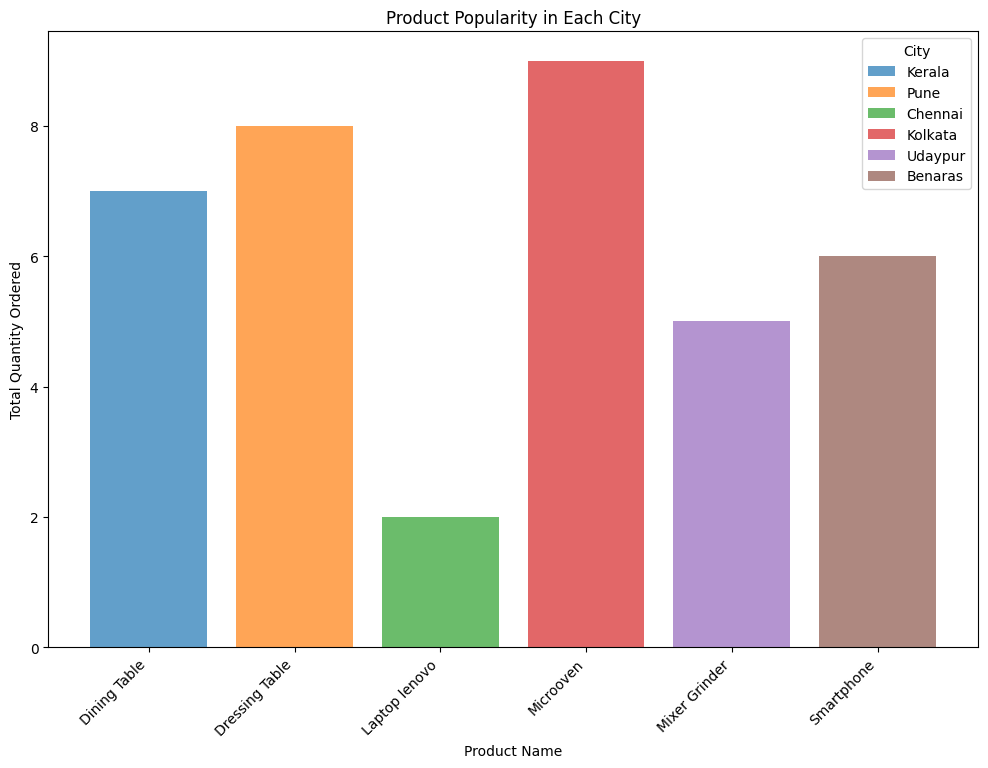

In [25]:
product_data = {
    'product_id': ['P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108'],
    'product_name': ['Microoven', 'Mixer Grinder', 'Laptop lenovo', 'Smartphone', 'Dressing Table', 'Dining Table', 'Washing Machine', 'Almirah'],
    'category': ['Appliance', 'Appliance', 'Electronics', 'Electronics', 'Furniture', 'Furniture', 'Appliance', 'Furniture'],
    'sub_category': ['Electronics', 'Electronics', 'Computer', 'Mobile Phone', 'Dressing Table', 'Dining', 'Electronics', 'Almirah'],
    'original_price': [30000.0, 5000.0, 56000.0, 35000.0, 4900.0, 4000.0, 11000.0, 55000.0],
    'selling_price': [28000.0, 4500.0, 52000.0, 30500.0, 3800.0, 3800.0, 9000.0, 55000.0],
    'stock': [24, 16, 12, 9, 8, 20, 11, 10]
}

order_data = {
    'order_id': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8'],
    'product_id': ['P101', 'P102', 'P103', 'P104', 'P105', 'P101', 'P106', 'P104'],
    'quantity_ordered': [3, 5, 2, 4, 8, 6, 7, 2],
    'city': ['Kolkata', 'Udaypur', 'Chennai', 'Benaras', 'Pune', 'Kolkata', 'Kerala', 'Benaras']
}

product_df = pd.DataFrame(product_data)
order_df = pd.DataFrame(order_data)

# Merge the product and order DataFrames
merged_df = pd.merge(product_df, order_df, on='product_id')

# Calculate the total order quantity for each product in each city
total_quantity_by_product_city = merged_df.groupby(['product_name', 'city'])['quantity_ordered'].sum().reset_index()

# Plotting the bar chart to analyze popularity in each city
plt.figure(figsize=(12, 8))
for city in total_quantity_by_product_city['city'].unique():
    city_data = total_quantity_by_product_city[total_quantity_by_product_city['city'] == city]
    plt.bar(city_data['product_name'], city_data['quantity_ordered'], label=city, alpha=0.7)

plt.title('Product Popularity in Each City')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.legend(title='City')
plt.xticks(rotation=45, ha='right')
plt.show()

## Conclusion:
In conclusion, e-commerce data analysis is a powerful tool for businesses seeking to thrive in the digital marketplace. It provides actionable insights that can drive strategic decisions, enhance customer experiences, and improve overall business performance. As technology continues to evolve, leveraging advanced analytics, artificial intelligence, and machine learning in e-commerce data analysis will become increasingly important for staying competitive and meeting customer expectations.



## Acknowledgement:
I would like to express my sincere gratitude to Suramya Biswas for mmenseuable support and guidance throughoistheir project. His expertise, encouragement, and feedback significantly shaped the project and improved my knowledge in understanding of the subject .I am also thankful to the other mentors of Anudip Foundatiould also thank my batchmates for continuoustheir support and help. The project allowed me to apply theoretical knowledge to practical scenarios and foster personal and academic growth. I am also grateful for the opportunity to explore python language and its applica throughout the projecttions. I conclude it by expressing gratitude to all those who contributed to the project's success, as the acquired skills will undoubtedly sou their future academic and professional endeavours.